<a href="https://colab.research.google.com/github/andrybrew/all-files/blob/master/VaderSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library

In [0]:
#Install Library
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.5MB/s 


In [0]:
#Import Library
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


##Import Data

In [0]:
#Import Data
data = pd.read_csv("/content/chrysler_cleaning.csv")

In [0]:
data.head()

,publish_date,filename,title,text
0,12/18/2019 0:00,chrysler_nytimes.com.txt,Fiat Chrysler and Peugeot Agree on Terms to Fo...,Fiat Chrysler and PSA of France said Wednesday...
1,10/31/2019 0:00,chrysler_nytimes.com.txt,Fiat Chrysler and Peugeot Planned Merger: A Bi...,"Carlos Tavares, the chief of PSA, is to be the..."
2,NaN,chrysler_nytimes.com.txt,Fiat Chrysler Automobiles N.V.,California to Stop Buying From Automakers That...
3,6/10/2019 0:00,chrysler_nytimes.com.txt,Fiat Chrysler in Deal for Self-Driving Car Tec...,Just days after breaking off merger talks with...
4,10/30/2019 0:00,chrysler_nytimes.com.txt,Fiat Chrysler and Peugeot Parent Are Expected ...,"After the merger, which will be an all-stock d..."


In [0]:
data.shape

(359, 4)

##Select Column

In [0]:
data.columns

Index(['publish_date', 'filename', 'title', 'text'], dtype='object')

In [0]:
columns = (['filename', 'text', 'publish_date'])
data = pd.DataFrame(data.drop(columns,axis=1,inplace=False))

In [0]:
data.head()

,title
0,Fiat Chrysler and Peugeot Agree on Terms to Fo...
1,Fiat Chrysler and Peugeot Planned Merger: A Bi...
2,Fiat Chrysler Automobiles N.V.
3,Fiat Chrysler in Deal for Self-Driving Car Tec...
4,Fiat Chrysler and Peugeot Parent Are Expected ...


##PreProcessing

###LowerCasing

In [0]:
#Change Title to String
data['title'] = data['title'].astype(str)

In [0]:
##Before Lowercasing
data['title'][2]

'Fiat Chrysler Automobiles N.V.'

In [0]:
## Lowercase all reviews
data['title'] = data['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['title'][2] ## to see the difference

'fiat chrysler automobiles n.v.'

In [0]:
data.head()

,title
0,fiat chrysler and peugeot agree on terms to fo...
1,fiat chrysler and peugeot planned merger: a bi...
2,fiat chrysler automobiles n.v.
3,fiat chrysler in deal for self-driving car tec...
4,fiat chrysler and peugeot parent are expected ...


###Special Character

In [0]:
import string

printable = set(string.printable)

def remove_spec_chars(in_str):
    return ''.join([c for c in in_str if c in printable])

data['title'].apply(remove_spec_chars)

0      fiat chrysler and peugeot agree on terms to fo...
1      fiat chrysler and peugeot planned merger: a bi...
2                         fiat chrysler automobiles n.v.
3      fiat chrysler in deal for self-driving car tec...
4      fiat chrysler and peugeot parent are expected ...
                             ...                        
354            chryslers can be hacked over the internet
355         chrysler 200: mid-size package, better looks
356          gear shift confusion causes chrysler recall
357                      chrysler agrees to recall jeeps
358               fiat 500: the car that saved chrysler?
Name: title, Length: 359, dtype: object

##Sentiment Analysis

In [0]:
# Import library for Text Analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in data.iterrows():
  data['title']
  ss = sid.polarity_scores(row['title'])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values
display(data.head(10))

,title,polarity
0,fiat chrysler and peugeot agree on terms to fo...,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
1,fiat chrysler and peugeot planned merger: a bi...,"{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp..."
2,fiat chrysler automobiles n.v.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,fiat chrysler in deal for self-driving car tec...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,fiat chrysler and peugeot parent are expected ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,how fiat chrysler sped from laggard to leader ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,u.a.w. and fiat chrysler reach tentative labor...,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp..."
7,"impeachment, fiat chrysler, ‘star wars’: your ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,g.m. sues rival over bribery scheme as union s...,"{'neg': 0.236, 'neu': 0.65, 'pos': 0.114, 'com..."
9,chrysler’s turbulent history,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


###Visualization

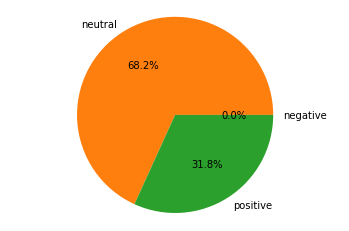

In [0]:
import matplotlib.pyplot as plt
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

###Save to CSV

In [0]:
data.to_csv('chrysler_Polarity.csv', index=False)